- Read Data

In [67]:
import pandas as pd

df_transaction = pd.read_csv(f"D:/Alterra Academy/tugas/data_ika-purwanti/22_Implementation-AI-on-Data-Engineer/praktikum/source/Data Penjualan.csv", sep=';')
df_transaction

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,05/08/2022,Foodpak 260,"1.000,00","Rp1.800,00","Rp1.800.000,00"
1,05/08/2022,Foodpak Matte 245,"1.000,00","Rp1.900,00","Rp1.900.000,00"
2,05/08/2022,Craft Laminasi 290,"5.000,00","Rp750,00","Rp3.750.000,00"
3,05/08/2022,Craft Laminasi 290,"1.000,00","Rp1.200,00","Rp1.200.000,00"
4,07/08/2022,Dupleks 310,"1.000,00","Rp1.550,00","Rp1.550.000,00"
...,...,...,...,...,...
1071,14/11/2023,Ivory 230,"1.000,00","Rp900,00","Rp900.000,00"
1072,15/11/2023,Craft Laminasi 290,"2.000,00","Rp800,00","Rp1.600.000,00"
1073,15/11/2023,Craft Laminasi 290,"1.500,00","Rp875,00","Rp1.312.500,00"
1074,15/11/2023,Food pak Matte,"1.000,00","Rp2.200,00","Rp2.200.000,00"


- Transform data

In [68]:
# samakan format tanggal
df_transaction['Tanggal'] = df_transaction['Tanggal'].str.replace('.', '/')

# Menghilangkan ',00' 
df_transaction['Jumlah Order'] = df_transaction['Jumlah Order'].str.replace(',00', '')
df_transaction['Harga'] = df_transaction['Harga'].str.replace(',00', '')
df_transaction['Total'] = df_transaction['Total'].str.replace(',00', '')

# Menghilangkan tulisan 'Rp'
df_transaction['Harga'] = df_transaction['Harga'].str.replace('Rp', '')
df_transaction['Total'] = df_transaction['Total'].str.replace('Rp', '')

# Mengubah tipe data menjadi numerik
df_transaction['Jumlah Order'] = pd.to_numeric(df_transaction['Jumlah Order'].str.replace('.', ''))
df_transaction['Harga'] = pd.to_numeric(df_transaction['Harga'].str.replace('.', ''))
df_transaction['Total'] = pd.to_numeric(df_transaction['Total'].str.replace('.', ''))
df_transaction

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,05/08/2022,Foodpak 260,1000,1800,1800000
1,05/08/2022,Foodpak Matte 245,1000,1900,1900000
2,05/08/2022,Craft Laminasi 290,5000,750,3750000
3,05/08/2022,Craft Laminasi 290,1000,1200,1200000
4,07/08/2022,Dupleks 310,1000,1550,1550000
...,...,...,...,...,...
1071,14/11/2023,Ivory 230,1000,900,900000
1072,15/11/2023,Craft Laminasi 290,2000,800,1600000
1073,15/11/2023,Craft Laminasi 290,1500,875,1312500
1074,15/11/2023,Food pak Matte,1000,2200,2200000


- Analisis Data

In [81]:
# produk paling banyak dibeli berdasarkan jumlah semua dari jumlah order
total_order_product = df_transaction.groupby('Jenis Produk')['Jumlah Order'].sum()

best_selling_product = total_order_product.idxmax()
value_best_selling_product = total_order_product.max()

print("Produk yang paling banyak dibeli:", best_selling_product, "\nJumlah pemesanan :", value_best_selling_product)

# produk dengan harga tertinggi
price_max = df_transaction['Harga'].max()

product_price_max = df_transaction[df_transaction['Harga'] == price_max]
value_product_price_max = product_price_max['Jenis Produk'].iloc[0]

print("\nProduk yang memiliki harga tertinggi:", value_product_price_max, "\nHarga : Rp. ", price_max)

# produk dengan harga terendah
price_min = df_transaction['Harga'].min()

product_price_min = df_transaction[df_transaction['Harga'] == price_min]
value_product_price_min = product_price_min['Jenis Produk'].iloc[0]

print("\nProduk yang memiliki harga terendah:", value_product_price_min, "\nHarga : Rp. ", price_min)

Produk yang paling banyak dibeli: Craft Laminasi 290  
Jumlah pemesanan : 246500

Produk yang memiliki harga tertinggi: Kinstruk 150 gsm 
Harga : Rp.  99970

Produk yang memiliki harga terendah: Grease Proof  
Harga : Rp.  100


- visualisasi data

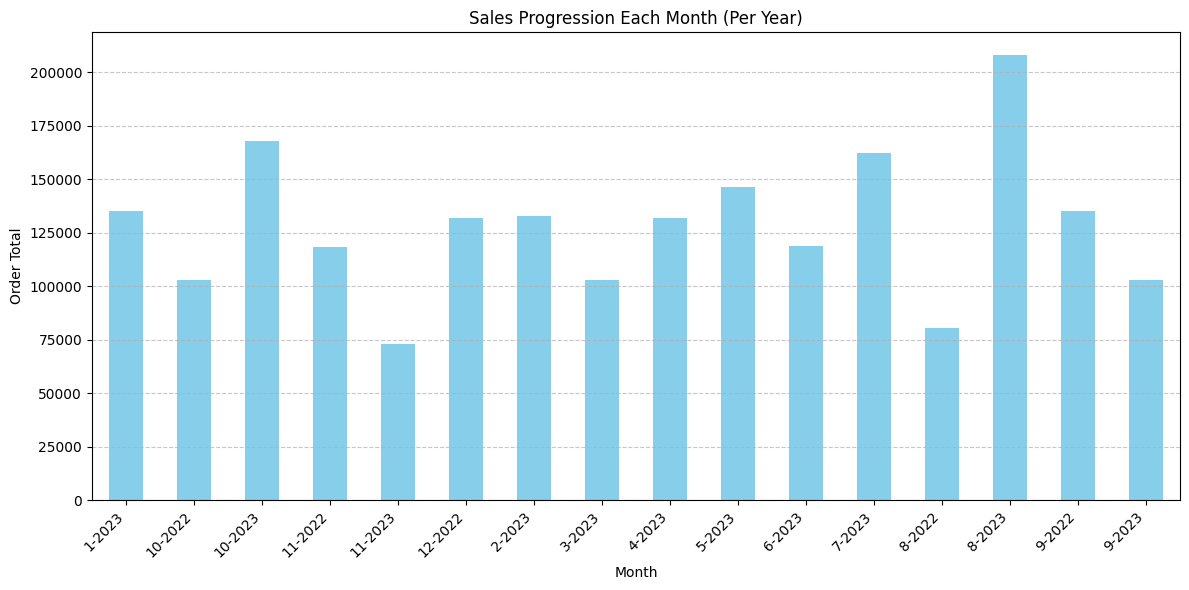

In [69]:
import matplotlib.pyplot as plt

df_transaction['Tanggal'] = pd.to_datetime(df_transaction['Tanggal'], format='%d/%m/%Y')

# Mendapatkan tahun dan bulan dari kolom Tanggal
df_transaction['Tahun'] = df_transaction['Tanggal'].dt.year
df_transaction['Bulan'] = df_transaction['Tanggal'].dt.month

# Menggabungkan tahun dan bulan untuk membuat grup unik
df_transaction['Bulan-Tahun'] = df_transaction['Bulan'].astype(str) + '-' + df_transaction['Tahun'].astype(str)

# Menghitung total penjualan per bulan
amount_transaction_per_month = df_transaction.groupby('Bulan-Tahun')['Jumlah Order'].sum()

# Membuat visualisasi
plt.figure(figsize=(12, 6))
amount_transaction_per_month.plot(kind='bar', color='skyblue')
plt.title('Sales Progression Each Month (Per Year)')
plt.xlabel('Month')
plt.ylabel('Order Total')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

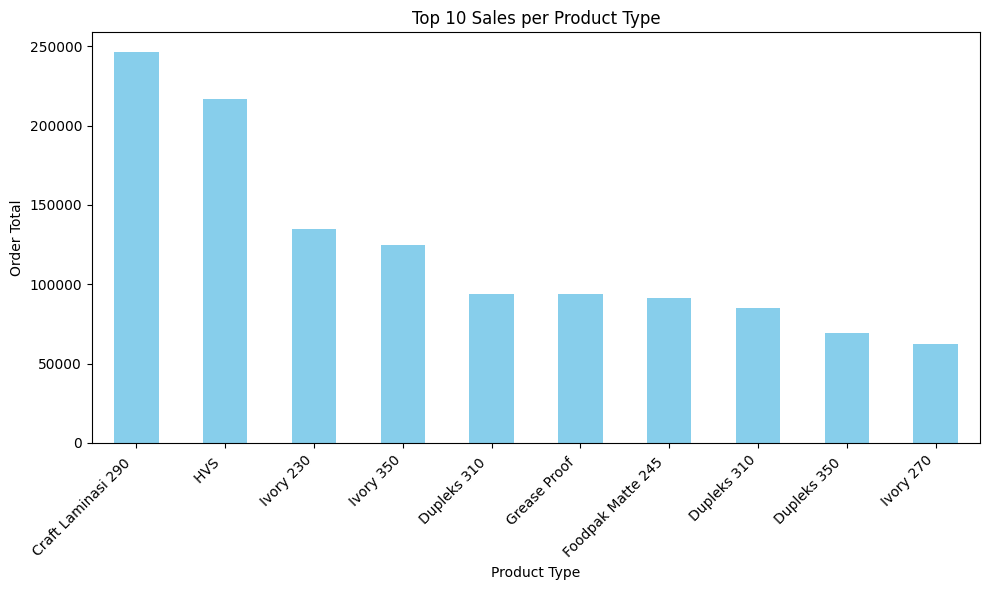

In [70]:
sum_order_per_product = df_transaction.groupby('Jenis Produk')['Jumlah Order'].sum()

# Mengambil 10 produk terbesar
top_10_type_product = sum_order_per_product.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_type_product.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Top 10 Sales per Product Type')
plt.xlabel('Product Type')
plt.ylabel('Order Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()